In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [314]:
import csv
import pandas as pd

DATA_FILE = '../data/09-19-Amazon-Ranking-Analysis.csv'
Amazon = pd.read_csv(DATA_FILE, encoding='latin-1')

#### The objective in this EDA is to first clean the dataset and then investigate the  Price/Rank of the product by Vendor Types. 

In [315]:
Amazon.head() 

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [316]:
Amazon.shape

(6973, 14)

In [317]:
Amazon.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

#### The dataset contains different sources of data for 'rank', 'VendorType' and 'Price', and each of them is quite different.
#### For example:

In [318]:
Amazon['BBVendorType'].value_counts()

Amazon                                5783
O                                      715
FBA                                    470
Ships from and sold by Amazon.com.       5
Name: BBVendorType, dtype: int64

In [319]:
Amazon['ScrapedIndexVendorType'].value_counts()

Other     6367
FBA        409
Amazon     192
7.99         2
6.49         1
11.04        1
57.97        1
Name: ScrapedIndexVendorType, dtype: int64

#### In this EDA, I will only use the data from Black Box Scraped, which makes more sense to me. 

In [320]:
Amazon.drop(['ScrapedIndex', 'ScrapedIndexTrueRank','ScrapedIndexPrice', 'CorrectedPrice', 'ScrapedIndexVendorType','BBScrapedPrice'], axis=1, inplace = True)

In [321]:
Amazon.head()

,Index,ProductName,ScrapeDate,CorrectedIndexTrueRank,ScrapedIndexVendor,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,Supplement Warriors,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,Sharp Nutrition,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,speedy tests,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,Drug Abuse Control,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,Lowest Priced Tests,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


#### Check the Vendor types

In [322]:
Amazon['BBVendorType'].value_counts()

Amazon                                5783
O                                      715
FBA                                    470
Ships from and sold by Amazon.com.       5
Name: BBVendorType, dtype: int64

#### Cleaning the Vendor types. Re-assign 'O' to 'others' Vendor type, and I consider 'Ships from and sold by Amazon.com' aslo as 'Amazon' Vendor type

In [323]:
Amazon['BBVendorType'].replace('O', 'others', inplace = True)
Amazon['BBVendorType'].replace('Ships from and sold by Amazon.com.', 'Amazon', inplace = True)
Amazon['BBVendorType'].value_counts()

Amazon    5788
others     715
FBA        470
Name: BBVendorType, dtype: int64

#### Check the missing data

In [324]:
Amazon.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
CorrectedIndexTrueRank      0
ScrapedIndexVendor          0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            5
dtype: int64

#### Replacing the missing data of BBVendor to 'NA'

In [325]:
Amazon['BBVendor'].fillna(value="NA", inplace=True)
# Verify there are no longer null values
Amazon.isnull().sum()

Index                     0
ProductName               0
ScrapeDate                0
CorrectedIndexTrueRank    0
ScrapedIndexVendor        0
BBVendorType              0
BBVendor                  0
BBCorrectedPrice          5
dtype: int64

### Drop the rows with NaN in 'BBCorrectedPrice' since there are only 5 of them out ot 6973 rows.

In [326]:
Amazon.loc[Amazon['BBCorrectedPrice'].isnull(),:]

,Index,ProductName,ScrapeDate,CorrectedIndexTrueRank,ScrapedIndexVendor,BBVendorType,BBVendor,BBCorrectedPrice
5051,5051,"Nizoral AntiDandruff Shampoo, 7-Ounce Bottles",2016/6/17,28,Smile 'n Saveâ?Other,Amazon,16.52,NaN
5224,5224,"Optimum Nutrition 100% Whey Gold Standard, Dou...",2016/6/26,3,Advantage Supplementsâ?Other,Amazon,67.3,NaN
5690,5690,Repel 100 Insect Repellent 4 oz. Pump Spray Si...,2016/9/6,22,Smile 'n Saveâ?Other,Amazon,14.66,NaN
5695,5695,Repel 100 Insect Repellent 4 oz. Pump Spray Si...,2016/9/6,27,Smile 'n Saveâ?Other,Amazon,14.66,NaN
6000,6000,Sassy Developmental Bumpy Ball,2016/8/30,54,ï¼´ï¼«ï¼§ï¼ï¼£ï¼¯ï¼?Other,Amazon,12.78,NaN


In [327]:
Amazon.dropna(inplace = True)
Amazon.isnull().sum()

Index                     0
ProductName               0
ScrapeDate                0
CorrectedIndexTrueRank    0
ScrapedIndexVendor        0
BBVendorType              0
BBVendor                  0
BBCorrectedPrice          0
dtype: int64

In [328]:
Amazon.shape

(6968, 8)

#### No more missing Values

#### Basic information of the price by vendor types

In [329]:
Amazon.groupby('BBVendorType')['BBCorrectedPrice'].describe()

,count,mean,std,min,25%,50%,75%,max
BBVendorType,,,,,,,,
Amazon,5783.0,46.049381,61.005512,7.69,16.52,23.98,49.590,553.97
FBA,470.0,46.602383,100.908712,0.00,11.28,17.05,36.430,706.11
others,715.0,43.672392,54.958436,2.50,11.00,22.90,38.665,184.99


#### Basic information of the rank by vendor types

In [330]:
Amazon.groupby('BBVendorType')['CorrectedIndexTrueRank'].describe()

,count,mean,std,min,25%,50%,75%,max
BBVendorType,,,,,,,,
Amazon,5783.0,23.485215,19.932090,1.0,8.0,18.0,35.0,107.0
FBA,470.0,8.685106,6.479654,1.0,3.0,7.0,12.0,30.0
others,715.0,14.408392,12.060466,1.0,5.0,11.0,20.0,51.0


#### Boxplot the price by these three vendor types

C:\Users\Zongyuan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


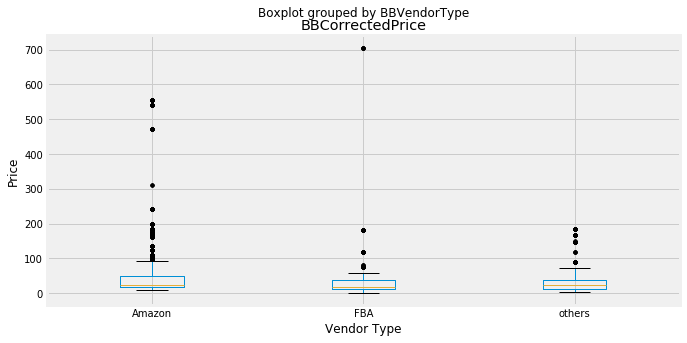

In [331]:
Amazon.boxplot(column = 'BBCorrectedPrice', by='BBVendorType', figsize=(11,5), sym='k.');

plt.xlabel('Vendor Type');
plt.ylabel('Price');

#### Boxplot the ranks of the product by these three vendor types

C:\Users\Zongyuan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


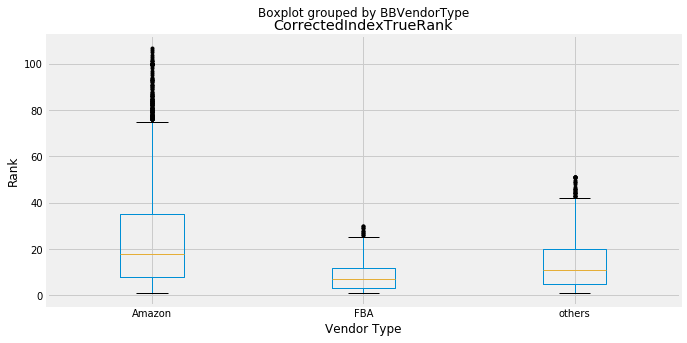

In [332]:
Amazon.boxplot(column = 'CorrectedIndexTrueRank', by='BBVendorType', figsize=(11,5), sym='k.')
plt.xlabel('Vendor Type');
plt.ylabel('Rank');

#### Histogram of the price by vendor types

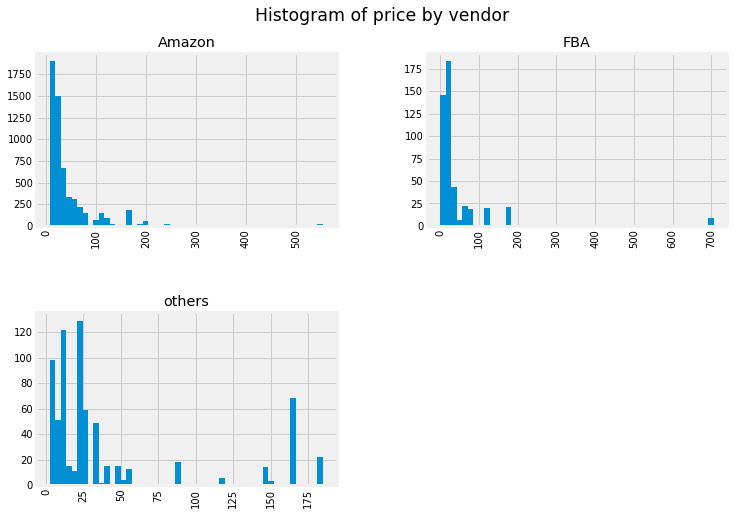

In [333]:
Amazon.hist(column='BBCorrectedPrice', by='BBVendorType', figsize=(12,8), bins=50);
plt.suptitle('Histogram of price by vendor', fontsize = 'xx-large');

#### If I put it in the same scale, apparently Amazon opccupies a large portion of the investigated data

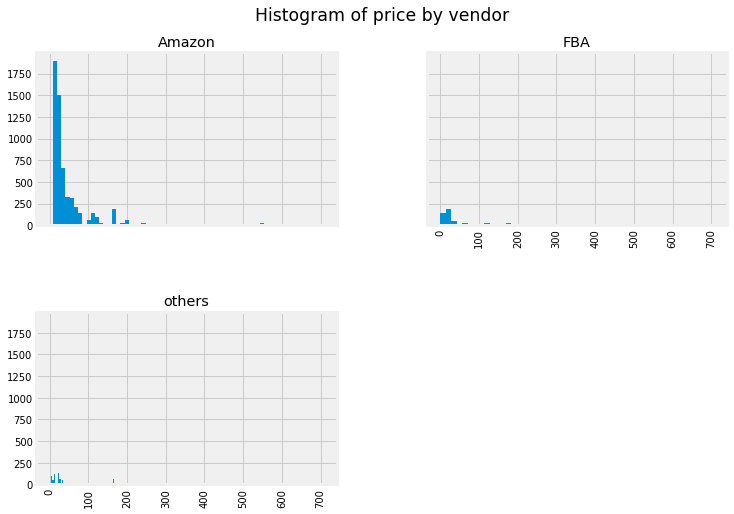

In [334]:
Amazon.hist(column='BBCorrectedPrice', by='BBVendorType', figsize=(12,8), bins=50, sharex=True, sharey=True);
plt.suptitle('Histogram of price by vendor', fontsize = 'xx-large');

(0, 300)

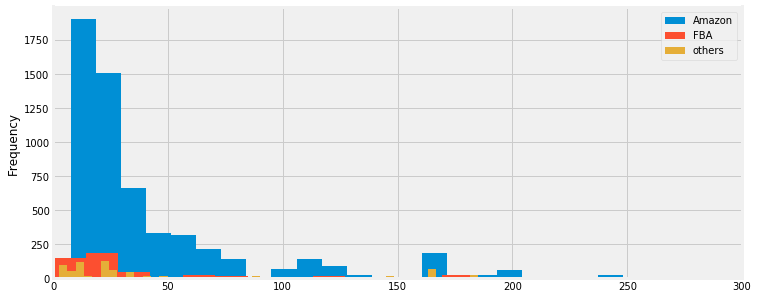

In [335]:
Amazon.groupby('BBVendorType')['BBCorrectedPrice'].plot(kind = 'hist', bins = 50, figsize=(11,5));
labels= ['Amazon',"FBA", "others"]
plt.legend(labels)
plt.xlim(xmin=0, xmax = 300)

#### Compare the rank of the product by vendor in histogram

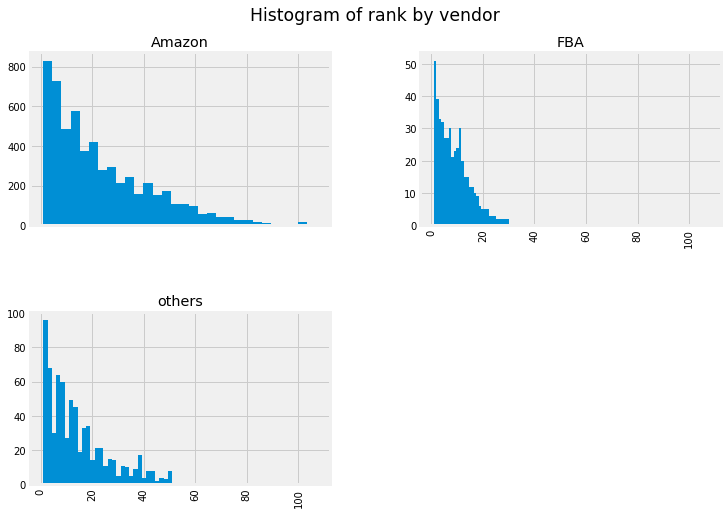

In [336]:
Amazon.hist(column='CorrectedIndexTrueRank', by='BBVendorType', figsize=(12,8),sharex=True, bins=30);
plt.suptitle('Histogram of rank by vendor', fontsize = 'xx-large');

#### Map the vendor type to numbers so that we can do the scatter plot 

In [337]:
Amazon.loc[:, 'Vendor_num'] = Amazon.loc[:, 'BBVendorType'].map({'Amazon':0, 'FBA':1, 'others':2})
Amazon.head()

,Index,ProductName,ScrapeDate,CorrectedIndexTrueRank,ScrapedIndexVendor,BBVendorType,BBVendor,BBCorrectedPrice,Vendor_num
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,1,Supplement Warriors,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,1
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016/6/14,2,Sharp Nutrition,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,1
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,speedy tests,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,1
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,Drug Abuse Control,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,1
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016/6/27,1,Lowest Priced Tests,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,1


#### Scatter plot the relationship of Price and Rank by Vendor types

(0, 300)

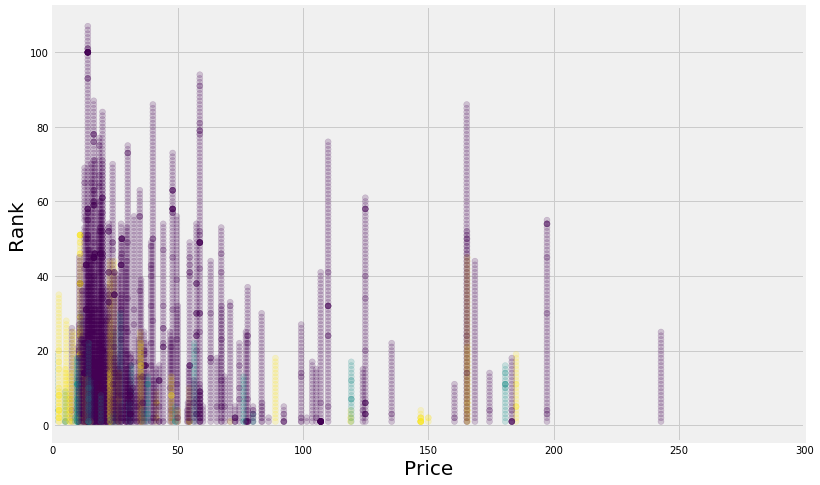

In [340]:
plt.figure(figsize=(12,8));
plt.scatter(data=Amazon, x='BBCorrectedPrice', y='CorrectedIndexTrueRank', c='Vendor_num', alpha = 0.2);
plt.xlabel('Price',fontsize=20);
plt.ylabel('Rank', fontsize=20);
plt.xlim(xmin=0, xmax = 300)

#### It can be seen that the plot is not really scattered, most of them are lines, which means some of the products have the exact same price but rank quite differently. I will look into this further in part 4.  